In [1]:
from base import *
from datetime import datetime
import pandas as pd
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType

In [2]:
#convert =  udf (lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'),String())
dates = orders.select("order_purchase_timestamp")
dates = dates.withColumn("date",to_date(dates.order_purchase_timestamp))
dates = dates.groupBy("date").count().sort(col("count").desc())


In [3]:
#On voit que c'est du 24 au 28 décembre que les Brasiliens s'affolent. Probablement le black friday
dates.show()

+----------+-----+
|      date|count|
+----------+-----+
|2017-11-24| 1176|
|2017-11-25|  499|
|2017-11-27|  403|
|2017-11-26|  391|
|2017-11-28|  380|
|2018-08-06|  372|
|2018-05-07|  372|
|2018-08-07|  370|
|2018-05-14|  364|
|2018-05-16|  357|
|2018-05-15|  352|
|2018-05-09|  344|
|2017-12-04|  337|
|2018-05-08|  331|
|2017-11-29|  323|
|2018-07-31|  322|
|2018-08-16|  320|
|2018-08-08|  316|
|2018-08-14|  316|
|2018-01-22|  314|
+----------+-----+
only showing top 20 rows



In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
datesP=dates.toPandas()

In [5]:
datesP['date'] = pd.to_datetime(datesP['date'])
datesP.index = datesP['date']

In [6]:
del datesP['date']

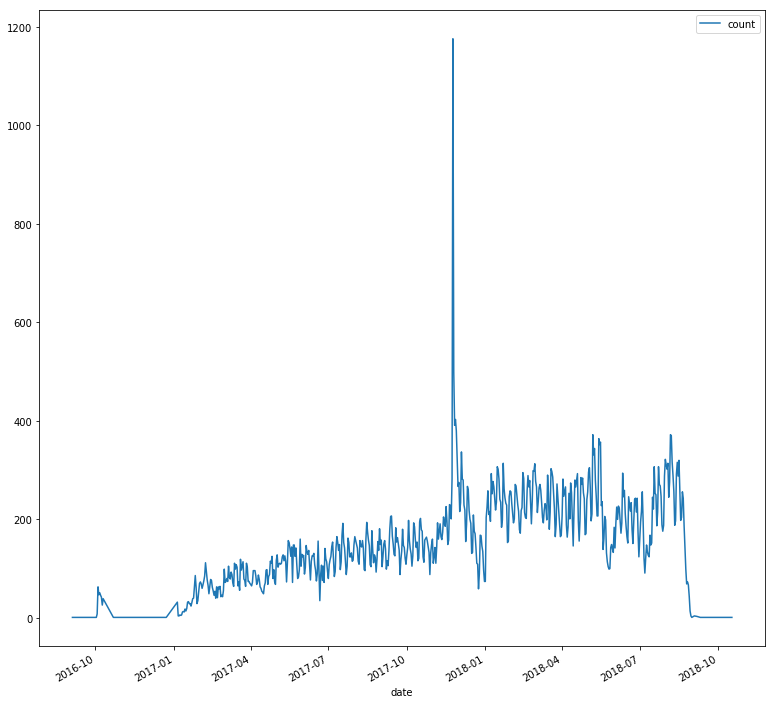

In [7]:
datesP.plot(figsize=(13,13))

In [21]:
#qu'est ce qu'on achète le plus pendant ces jours, quel CA y est généré?
#dates.limit(5).collect()
shoe=dates.select("date").rdd.collect()
shoe[0].date


datetime.date(2017, 11, 24)